In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 46s 10us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [20]:
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

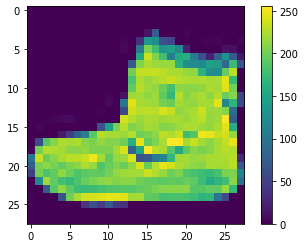

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0

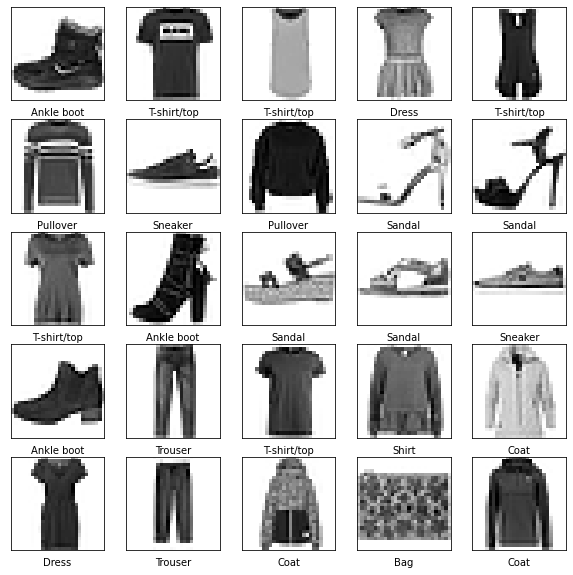

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.Conv2D(32, 3, activation ='relu')
        self.flatten = tf.keras.Flatten()
        self.d1 = tf.keras.Dense(128, activation = 'relu')
        self.d2 = tf.keras.Dense(10, activation = 'softmax')

def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0863 - accuracy: 0.6543
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6418 - accuracy: 0.7685
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5674 - accuracy: 0.7967
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5247 - accuracy: 0.8139
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4967 - accuracy: 0.8239
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4762 - accuracy: 0.8319
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4606 - accuracy: 0.8375
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4482 - accuracy: 0.8417
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4384 - accuracy: 0.8453
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.429

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4571 - accuracy: 0.8364 - 357ms/epoch - 1ms/step

Test accuracy: 0.8363999724388123


In [33]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 589us/step


array([5.6637816e-07, 6.5993866e-08, 5.0786107e-06, 1.2780022e-06,
       6.0716388e-06, 1.2645161e-01, 1.0096209e-05, 2.6513320e-01,
       4.4353059e-03, 6.0395676e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

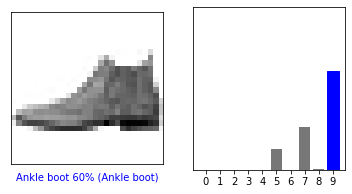

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

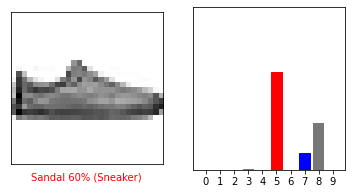

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

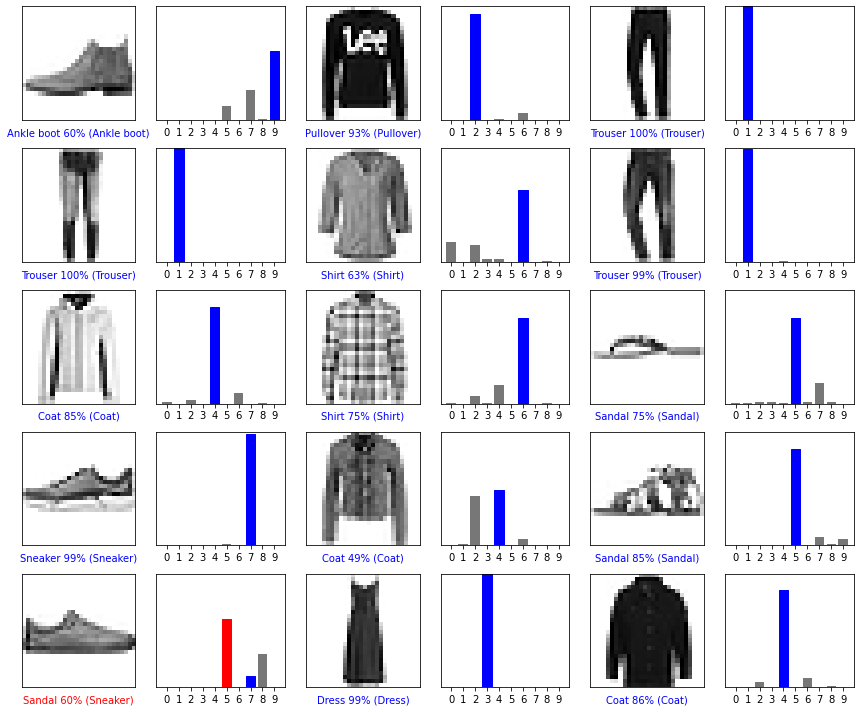

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
# Grab an image from the test dataset.
img = test_images[103]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 12ms/step
[[2.4862228e-02 1.6165070e-03 6.6905814e-01 1.6706612e-02 4.6696067e-02
  9.6593214e-07 2.4004434e-01 4.2082002e-10 1.0151281e-03 1.2347398e-09]]


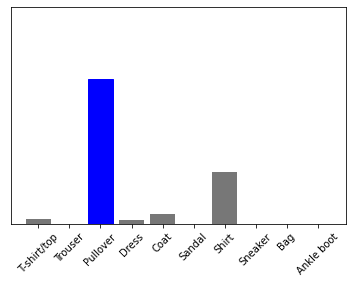

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [59]:
np.argmax(predictions_single[0])

2